- This script compares results to those calculated using the supporting .py files from Petrelli

In [1]:
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')

my_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

### It is worth nothing, even with a fixed random state, the version of Sklearn changes the calculated result for the test dataset
- Thus, these benchmarks will no longer match the version initially released by Petrelli et al. (2020). 

Text(0, 0.5, 'Calc P (v0.23.2) - Calc P (v1.0.2) \n (kbar)')

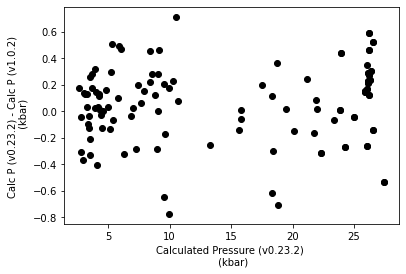

In [3]:
Import=pd.read_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')
plt.plot(Import['Cpx_Liq_Pressure_v023_2'],
         Import['Cpx_Liq_Pressure_v023_2']-Import['Cpx_Liq_Pressure_v102'], 
         'ok')
plt.xlabel('Calculated Pressure (v0.23.2) \n (kbar)')
plt.ylabel('Calc P (v0.23.2) - Calc P (v1.0.2) \n (kbar)')

## Cpx-liq Press

In [4]:
pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                           equationP="P_Petrelli2020_Cpx_Liq")#.P_kbar_calc


,P_kbar_calc,Median_Trees,Std_Trees,IQR_Trees
0,2.860700,2.000000,2.865335,1.87500
1,3.421923,2.000000,3.428284,4.00000
2,3.236583,2.000000,3.089905,1.37550
3,9.041349,9.300000,4.209245,5.85725
4,10.029089,9.900000,4.569013,7.98000
...,...,...,...,...
114,3.198926,2.000000,3.483214,4.99900
115,3.254226,0.001013,4.788980,6.99900
116,5.572789,5.000000,5.230300,8.54500
117,23.671429,24.500000,5.326005,7.75000


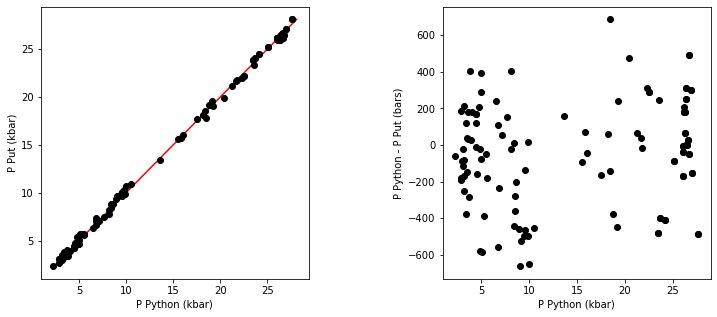

In [5]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_Liq_Pressure_from_py']
P_py=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
                                equationP="P_Petrelli2020_Cpx_Liq").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Cpx-Liq temp

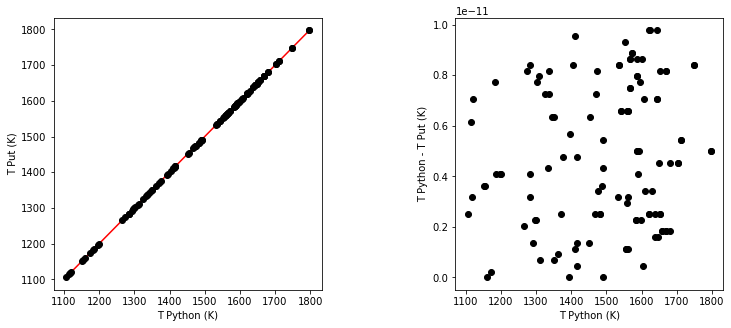

In [6]:
T_Put=my_input['Cpx_Liq_Temp_from_py'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, equationT="T_Petrelli2020_Cpx_Liq").T_K_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put (K)')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)


## Cpx-only Pressure

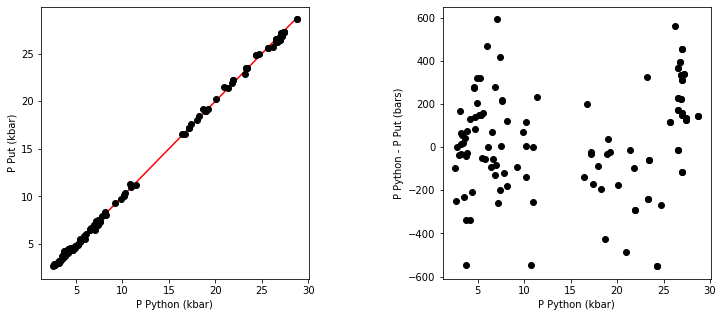

In [8]:
# Uses Temp from Talk1
P_Put=my_input['Cpx_only_Pressure_from_py']
P_py=pt.calculate_cpx_only_press(cpx_comps=Cpx_test,  equationP="P_Petrelli2020_Cpx_only").P_kbar_calc
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)